<a href="https://colab.research.google.com/github/farhan1503001/Generative-Deep-Learning-With-Tensorflow/blob/main/Basic%20AutoEncoder/Dimensionality_Reduction_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Auto Encoder Implementation
**This autoencoder takes three dimensional data and then encodes it into two dimensions and then decodes it back into three dimension**

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**Preparing Dataset**

In [3]:
def generate_data(m):
    '''plots m random points on a 3D plane'''

    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
    data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
    
    return data

**Data Generation**

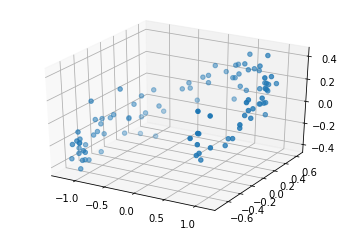

In [4]:
#Generating data
x_data=generate_data(100)
#Normalize data to have 0 mean
x_data=x_data-x_data.mean(axis=0,keepdims=False)

#Now plotting this 3d data
ax=plt.axes(projection='3d')
ax.scatter3D(x_data[:,0],x_data[:,1],x_data[:,2],cmap='red')


**Building AutoEncoder Model**

In [5]:
#Creating autoencoder function
encoder_model=keras.models.Sequential([keras.layers.Dense(units=2,input_shape=[3])])
decoder_model=keras.models.Sequential([keras.layers.Dense(units=3,input_shape=[2])])

autoencoder=keras.models.Sequential([encoder_model,decoder_model])

# Training the model

In [6]:
autoencoder.compile(loss='mse',optimizer=keras.optimizers.Adam(learning_rate=0.001))

In [8]:
#Now training the auto encoder
autoencoder.fit(x=x_data,y=x_data,epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0203
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0202
Epoch 3/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0201
Epoch 4/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0200
Epoch 5/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0199
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0198
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0197
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0196
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0195
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0194
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0192
Epoch 13/300
4/4 [==============================] - 0s 5ms/st

**Now Visualizing encoder and decoder data**

In [9]:
encoding=encoder_model.predict(x_data)
#checking dimension
print("Data Dimension: {}".format(x_data.shape))
print("Encode Dimension: {}".format(encoding.shape))

Data Dimension: (100, 3)
Encode Dimension: (100, 2)


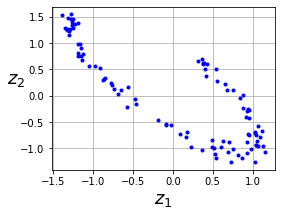

In [10]:
fig=plt.figure(figsize=(4,3))
plt.plot(encoding[:,0],encoding[:,1],"b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

**Now checking decoder**

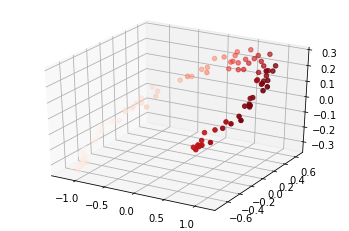

In [14]:
decodings=decoder_model.predict(encoding)
# plot the decoder output
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');